In [1]:
# Import libraries
# yfinance offers a reliable, threaded, and Pythonic way to download historical market data from Yahoo! finance
# Please check out its official doc for details: https://pypi.org/project/yfinance/
import yfinance as yf
import pandas as pd

# Load historical data in the past 10 years
sp500 = yf.Ticker("^GSPC")
end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=10*365)
sp500_history=sp500.history(start=start_date, end=end_date)

# Remove unnecessary columns
sp500_history = sp500_history.drop(columns=['Dividends', 'Stock Splits'])

# Create a new column as Close 200 days moving average
sp500_history['Close_200ma'] = sp500_history['Close'].rolling(200).mean()

# Create a summary statistics table
sp500_history_summary = sp500_history.describe()

In [2]:
sp500_history

,Open,High,Low,Close,Volume,Close_200ma
Date,,,,,,
2013-10-23 00:00:00-04:00,1752.270020,1752.270020,1740.500000,1746.380005,3713380000,NaN
2013-10-24 00:00:00-04:00,1747.479980,1753.939941,1745.500000,1752.069946,3671700000,NaN
2013-10-25 00:00:00-04:00,1756.010010,1759.819946,1752.449951,1759.770020,3175720000,NaN
2013-10-28 00:00:00-04:00,1759.420044,1764.989990,1757.670044,1762.109985,3282300000,NaN
2013-10-29 00:00:00-04:00,1762.930054,1772.089966,1762.930054,1771.949951,3358460000,NaN
...,...,...,...,...,...,...
2023-10-16 00:00:00-04:00,4342.370117,4383.330078,4342.370117,4373.629883,3409960000,4224.010551
2023-10-17 00:00:00-04:00,4345.229980,4393.569824,4337.540039,4373.200195,3794850000,4226.630151
2023-10-18 00:00:00-04:00,4357.350098,4364.200195,4303.839844,4314.600098,3686030000,4229.005652


In [3]:
sp500_history_summary

,Open,High,Low,Close,Volume,Close_200ma
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2317.000000
mean,2953.562601,2969.542107,2936.265266,2953.942424,3.934069e+09,2943.312876
std,890.934906,897.283533,884.334130,890.985956,9.702269e+08,834.748524
min,1743.819946,1752.270020,1737.920044,1741.890015,0.000000e+00,1862.753997
25%,2104.385010,2112.489929,2095.875000,2105.147461,3.341165e+09,2101.465294
50%,2768.165039,2779.164917,2748.829956,2761.879883,3.750675e+09,2764.023452
75%,3838.484924,3861.799988,3805.484985,3830.662598,4.295920e+09,3843.210408
max,4804.509766,4818.620117,4780.040039,4796.560059,9.976520e+09,4496.905588


c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hungl\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

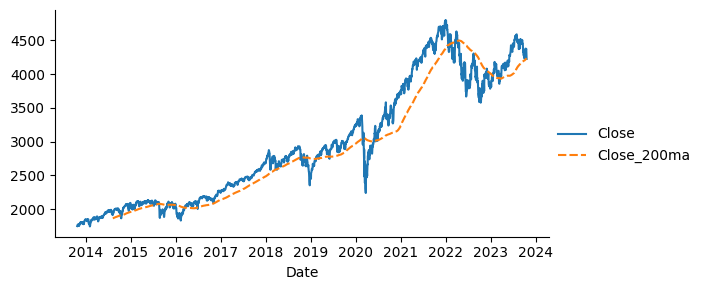

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.relplot(data=sp500_history[['Close', 'Close_200ma']], kind='line', height=3, aspect=2.0)
plt.savefig('chart.png')

In [5]:
# 1. Set up multiple variables to store the titles, text within the report
page_title_text='My report'
title_text = 'Daily S&P 500 prices report'
text = 'Hello, welcome to your report!'
prices_text = 'Historical prices of S&P 500'
stats_text = 'Historical prices summary statistics'


# 2. Combine them together using a long f-string
html = f'''
    <html>
        <head>
            <title>{page_title_text}</title>
        </head>
        <body>
            <h1>{title_text}</h1>
            <p>{text}</p>
            <img src='chart.png' width="700">
            <h2>{prices_text}</h2>
            {sp500_history.tail(3).to_html()}
            <h2>{stats_text}</h2>
            {sp500_history_summary.to_html()}
        </body>
    </html>
    '''
# 3. Write the html string as an HTML file
with open('html_report.html', 'w') as f:
    f.write(html)